In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
from sklearn.metrics import confusion_matrix
import numpy as np

In [72]:
import pandas as pd
data =pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [73]:
test_data = pd.read_csv("test.csv")

In [74]:
data = data.drop(columns = ['ID','Payment Plan', 
                            'Accounts Delinquent', 'Total Received Late Fee', 
                            'Collection Recovery Fee', 'Total Received Interest', 
                            'Recoveries','Total Collection Amount'])

test_data = test_data.drop(columns = ['ID','Payment Plan', 
                            'Accounts Delinquent', 'Total Received Late Fee', 
                            'Collection Recovery Fee', 'Total Received Interest', 
                            'Recoveries','Total Collection Amount'])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

In [121]:
data.head(10)

,n_estimators,max_depth,AUC
0,20,1,0.530820
1,20,5,0.575453
2,20,10,0.709838
3,20,50,0.998529
4,20,100,0.998923
5,20,500,0.998884
6,20,1000,0.998953
7,40,1,0.537567
8,40,5,0.602389
9,40,10,0.763718


## Feature Engineering

In [76]:
data['Interest Rate']=data['Interest Rate'].apply(np.int64)
data['Revolving Utilities']=data['Revolving Utilities'].apply(np.int64)
data['Debit to Income']=data['Debit to Income'].apply(np.int64)

In [77]:

test_data['Interest Rate']=test_data['Interest Rate'].apply(np.int64)
test_data['Revolving Utilities']=test_data['Revolving Utilities'].apply(np.int64)
test_data['Debit to Income']=test_data['Debit to Income'].apply(np.int64)


In [78]:
data['Loan Title'] = data['Loan Title'].str[:3]
data['Loan Title'] = data['Loan Title'].str.upper()

test_data['Loan Title'] = test_data['Loan Title'].str[:3]
test_data['Loan Title'] = test_data['Loan Title'].str.upper()

In [79]:
y = data['Loan Status']
data.drop(['Loan Status'], axis = 1, inplace = True) 

test_data.drop(['Loan Status'], axis = 1, inplace = True)

In [80]:
dupli = data[data.duplicated(keep="last")]
dupli

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Collection 12 months Medical,Application Type,Last week Pay,Total Current Balance,Total Revolving Credit Limit


In [81]:
categorical_feature_mask = data.dtypes==object
categorical = data.columns[categorical_feature_mask].tolist()
categorical

['Batch Enrolled',
 'Grade',
 'Sub Grade',
 'Employment Duration',
 'Verification Status',
 'Loan Title',
 'Initial List Status',
 'Application Type']

## Spliting data

In [82]:
# splitting the data 
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.3, random_state=42)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.3)

In [83]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(y_train.shape,y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(x_cv.shape,y_cv.shape))

the shape of x_train data,(33056, 26) and shape of x_test data (20239, 26):
the shape of y_train data,(33056,) and shape of y_test data (20239,):
the shape of x_cv data,(14168, 26) and shape of y_cv data (14168,):


## Transforming data

In [84]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [85]:
from sklearn.preprocessing import Normalizer
SS=Normalizer()

In [86]:
SS.fit(x_train['Loan Amount'].values.reshape(-1,1))

x_train_real_loan_amount = SS.transform(x_train['Loan Amount'].values.reshape(-1,1))
x_test_real_loan_amount = SS.transform(x_test['Loan Amount'].values.reshape(-1,1))
x_cv_real_loan_amount = SS.transform(x_cv['Loan Amount'].values.reshape(-1,1))
test_cv_real_loan_amount = SS.transform(test_data['Loan Amount'].values.reshape(-1,1))

x_train_real_loan_amount.shape

(33056, 1)

In [87]:
SS.fit(x_train['Funded Amount'].values.reshape(-1,1))

x_train_real_funded_amount = SS.transform(x_train['Funded Amount'].values.reshape(-1,1))
x_test_real_funded_amount = SS.transform(x_test['Funded Amount'].values.reshape(-1,1))
x_cv_real_funded_amount = SS.transform(x_cv['Funded Amount'].values.reshape(-1,1))
test_cv_real_funded_amount = SS.transform(test_data['Funded Amount'].values.reshape(-1,1))

In [88]:
SS.fit(x_train['Funded Amount Investor'].values.reshape(-1,1))

x_train_real_investor = SS.transform(x_train['Funded Amount Investor'].values.reshape(-1,1))
x_test_real_investor = SS.transform(x_test['Funded Amount Investor'].values.reshape(-1,1))
x_cv_real_investor = SS.transform(x_cv['Funded Amount Investor'].values.reshape(-1,1))
test_cv_real_investor = SS.transform(test_data['Funded Amount Investor'].values.reshape(-1,1))

In [89]:
SS.fit(x_train['Term'].values.reshape(-1,1))

x_train_real_term = SS.transform(x_train['Term'].values.reshape(-1,1))
x_test_real_term = SS.transform(x_test['Term'].values.reshape(-1,1))
x_cv_real_term = SS.transform(x_cv['Term'].values.reshape(-1,1))
test_cv_real_term = SS.transform(test_data['Term'].values.reshape(-1,1))

In [90]:
SS.fit(x_train['Interest Rate'].values.reshape(-1,1))

x_train_real_rate = SS.transform(x_train['Interest Rate'].values.reshape(-1,1))
x_test_real_rate = SS.transform(x_test['Interest Rate'].values.reshape(-1,1))
x_cv_real_rate = SS.transform(x_cv['Interest Rate'].values.reshape(-1,1))
test_cv_real_rate = SS.transform(test_data['Interest Rate'].values.reshape(-1,1))

In [91]:
SS.fit(x_train['Home Ownership'].values.reshape(-1,1))

x_train_real_home = SS.transform(x_train['Home Ownership'].values.reshape(-1,1))
x_test_real_home = SS.transform(x_test['Home Ownership'].values.reshape(-1,1))
x_cv_real_home = SS.transform(x_cv['Home Ownership'].values.reshape(-1,1))
test_cv_real_home = SS.transform(test_data['Home Ownership'].values.reshape(-1,1))

In [92]:
SS.fit(x_train['Debit to Income'].values.reshape(-1,1))

x_train_real_di = SS.transform(x_train['Debit to Income'].values.reshape(-1,1))
x_test_real_di = SS.transform(x_test['Debit to Income'].values.reshape(-1,1))
x_cv_real_di = SS.transform(x_cv['Debit to Income'].values.reshape(-1,1))
test_cv_real_di = SS.transform(test_data['Debit to Income'].values.reshape(-1,1))

In [93]:
SS.fit(x_train['Delinquency - two years'].values.reshape(-1,1))

x_train_real_dtwoyears = SS.transform(x_train['Delinquency - two years'].values.reshape(-1,1))
x_test_real_dtwoyears = SS.transform(x_test['Delinquency - two years'].values.reshape(-1,1))
x_cv_real_dtwoyears = SS.transform(x_cv['Delinquency - two years'].values.reshape(-1,1))
test_cv_real_dtwoyears = SS.transform(test_data['Delinquency - two years'].values.reshape(-1,1))

In [94]:
SS.fit(x_train['Inquires - six months'].values.reshape(-1,1))

x_train_real_ismonths = SS.transform(x_train['Inquires - six months'].values.reshape(-1,1))
x_test_real_ismonths = SS.transform(x_test['Inquires - six months'].values.reshape(-1,1))
x_cv_real_ismonths = SS.transform(x_cv['Inquires - six months'].values.reshape(-1,1))
test_cv_real_ismonths = SS.transform(test_data['Inquires - six months'].values.reshape(-1,1))

In [95]:
SS.fit(x_train['Open Account'].values.reshape(-1,1))

x_train_real_oaccount = SS.transform(x_train['Open Account'].values.reshape(-1,1))
x_test_real_oaccount = SS.transform(x_test['Open Account'].values.reshape(-1,1))
x_cv_real_oaccount = SS.transform(x_cv['Open Account'].values.reshape(-1,1))
test_cv_real_oaccount = SS.transform(test_data['Open Account'].values.reshape(-1,1))

In [96]:
SS.fit(x_train['Revolving Balance'].values.reshape(-1,1))

x_train_real_rbalance = SS.transform(x_train['Revolving Balance'].values.reshape(-1,1))
x_test_real_rbalance = SS.transform(x_test['Revolving Balance'].values.reshape(-1,1))
x_cv_real_rbalance = SS.transform(x_cv['Revolving Balance'].values.reshape(-1,1))
test_cv_real_rbalance = SS.transform(test_data['Revolving Balance'].values.reshape(-1,1))

In [97]:
SS.fit(x_train['Revolving Utilities'].values.reshape(-1,1))

x_train_real_rutilities = SS.transform(x_train['Revolving Utilities'].values.reshape(-1,1))
x_test_real_rutilities = SS.transform(x_test['Revolving Utilities'].values.reshape(-1,1))
x_cv_real_rutilities = SS.transform(x_cv['Revolving Utilities'].values.reshape(-1,1))
test_cv_real_rutilities = SS.transform(test_data['Revolving Utilities'].values.reshape(-1,1))

In [98]:
SS.fit(x_train['Total Accounts'].values.reshape(-1,1))

x_train_real_taccount = SS.transform(x_train['Total Accounts'].values.reshape(-1,1))
x_test_real_taccount = SS.transform(x_test['Total Accounts'].values.reshape(-1,1))
x_cv_real_taccount = SS.transform(x_cv['Total Accounts'].values.reshape(-1,1))
test_cv_real_taccount = SS.transform(test_data['Total Accounts'].values.reshape(-1,1))

In [99]:
SS.fit(x_train['Collection 12 months Medical'].values.reshape(-1,1))

x_train_real_medical = SS.transform(x_train['Collection 12 months Medical'].values.reshape(-1,1))
x_test_real_medical = SS.transform(x_test['Collection 12 months Medical'].values.reshape(-1,1))
x_cv_real_medical = SS.transform(x_cv['Collection 12 months Medical'].values.reshape(-1,1))
test_cv_real_medical = SS.transform(test_data['Collection 12 months Medical'].values.reshape(-1,1))

In [100]:
SS.fit(x_train['Last week Pay'].values.reshape(-1,1))

x_train_real_pay = SS.transform(x_train['Last week Pay'].values.reshape(-1,1))
x_test_real_pay = SS.transform(x_test['Last week Pay'].values.reshape(-1,1))
x_cv_real_pay = SS.transform(x_cv['Last week Pay'].values.reshape(-1,1))
test_cv_real_pay = SS.transform(test_data['Last week Pay'].values.reshape(-1,1))

In [101]:
SS.fit(x_train['Total Current Balance'].values.reshape(-1,1))

x_train_real_tcbalance = SS.transform(x_train['Total Current Balance'].values.reshape(-1,1))
x_test_real_tcbalance = SS.transform(x_test['Total Current Balance'].values.reshape(-1,1))
x_cv_real_tcbalance = SS.transform(x_cv['Total Current Balance'].values.reshape(-1,1))
test_cv_real_tcbalance = SS.transform(test_data['Total Current Balance'].values.reshape(-1,1))

In [102]:
SS.fit(x_train['Total Revolving Credit Limit'].values.reshape(-1,1))

x_train_real_trcl = SS.transform(x_train['Total Revolving Credit Limit'].values.reshape(-1,1))
x_test_real_trcl = SS.transform(x_test['Total Revolving Credit Limit'].values.reshape(-1,1))
x_cv_real_trcl = SS.transform(x_cv['Total Revolving Credit Limit'].values.reshape(-1,1))
test_cv_real_trcl = SS.transform(test_data['Total Revolving Credit Limit'].values.reshape(-1,1))

In [103]:
SS.fit(x_train['Public Record'].values.reshape(-1,1))

x_train_real_precord = SS.fit_transform(x_train['Public Record'].values.reshape(-1,1))
x_test_real_precord = SS.fit_transform(x_test['Public Record'].values.reshape(-1,1))
x_cv_real_precord = SS.fit_transform(x_cv['Public Record'].values.reshape(-1,1))
test_cv_real_precord = SS.fit_transform(test_data['Public Record'].values.reshape(-1,1))

In [104]:
real_x_train = np.concatenate((x_train_real_loan_amount,x_train_real_funded_amount,x_train_real_investor,x_train_real_term,
                                x_train_real_rate,x_train_real_home,x_train_real_di,x_train_real_dtwoyears,x_train_real_ismonths,
                                x_train_real_oaccount,x_train_real_precord,x_train_real_rbalance,x_train_real_rutilities,
                                x_train_real_taccount,x_train_real_medical,x_train_real_pay,
                                x_train_real_tcbalance,x_train_real_trcl),axis = 1)

In [105]:
real_x_test = np.concatenate((x_test_real_loan_amount,x_test_real_funded_amount,x_test_real_investor,x_test_real_term,
x_test_real_rate,x_test_real_home,x_test_real_di,x_test_real_dtwoyears,x_test_real_ismonths,
x_test_real_oaccount,x_test_real_precord,x_test_real_rbalance,x_test_real_rutilities,
x_test_real_taccount,x_test_real_medical,x_test_real_pay,
x_test_real_tcbalance,x_test_real_trcl),axis=1)

In [106]:
real_x_cv = np.concatenate((x_cv_real_loan_amount,x_cv_real_funded_amount,x_cv_real_investor,x_cv_real_term,
x_cv_real_rate,x_cv_real_home,x_cv_real_di,x_cv_real_dtwoyears,x_cv_real_ismonths,
x_cv_real_oaccount,x_cv_real_precord,x_cv_real_rbalance,x_cv_real_rutilities,
x_cv_real_taccount,x_cv_real_medical,x_cv_real_pay,x_cv_real_tcbalance,
x_cv_real_trcl),axis=1)

In [107]:
real_testpred= np.concatenate((test_cv_real_loan_amount,test_cv_real_funded_amount,test_cv_real_investor,test_cv_real_term,
test_cv_real_rate,test_cv_real_home,test_cv_real_di,test_cv_real_dtwoyears,test_cv_real_ismonths,
test_cv_real_oaccount,test_cv_real_precord,test_cv_real_rbalance,test_cv_real_rutilities,
test_cv_real_taccount,test_cv_real_medical,test_cv_real_pay,test_cv_real_tcbalance,
test_cv_real_trcl),axis=1)

In [108]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [41]:
def get_gv_fea_dict(alpha, feature, df):   
    value_count = x_train[feature].value_counts()

    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,3):
            cls_cnt = x_train.loc[(y_train==k) & (x_train[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = x_train[feature].value_counts()
    
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

In [42]:
#response-coding of the job feature
# alpha is used for laplace smoothing
alpha = 1
# train job feature
train_batch_feature_responseCoding = np.array(get_gv_feature(alpha, 'Batch Enrolled', x_train))
# test job feature
test_batch_feature_responseCoding = np.array(get_gv_feature(alpha, 'Batch Enrolled', x_test))
# cross validation job feature
cv_batch_feature_responseCoding = np.array(get_gv_feature(alpha, 'Batch Enrolled', x_cv))
test_data_batch_response = np.array(get_gv_feature(alpha, 'Batch Enrolled', test_data))

In [43]:
alpha = 1
# train job feature
train_Grade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Grade', x_train))
# test job feature
test_Grade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Grade', x_test))
# cross validation job feature
cv_Grade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Grade', x_cv))
test_Grade_batch_response = np.array(get_gv_feature(alpha, 'Grade', test_data))

In [44]:
alpha = 1
# train job feature
train_sGrade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Sub Grade', x_train))
# test job feature
test_sGrade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Sub Grade', x_test))
# cross validation job feature
cv_sGrade_feature_responseCoding = np.array(get_gv_feature(alpha, 'Sub Grade', x_cv))
test_sGrade_batch_response = np.array(get_gv_feature(alpha, 'Sub Grade', test_data))

In [45]:
alpha = 1
# train job feature
train_Employment_feature_responseCoding = np.array(get_gv_feature(alpha, 'Employment Duration', x_train))
# test job feature
test_Employment_feature_responseCoding = np.array(get_gv_feature(alpha, 'Employment Duration', x_test))
# cross validation job feature
cv_Employment_feature_responseCoding = np.array(get_gv_feature(alpha, 'Employment Duration', x_cv))
test_Employment_batch_response = np.array(get_gv_feature(alpha, 'Employment Duration', test_data))

In [46]:
alpha = 1
# train job feature
train_VStatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Verification Status', x_train))
# test job feature
test_VStatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Verification Status', x_test))
# cross validation job feature
cv_VStatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Verification Status', x_cv))
test_VStatus_batch_response = np.array(get_gv_feature(alpha, 'Verification Status', test_data))

In [47]:
alpha = 1
# train job feature
train_title_feature_responseCoding = np.array(get_gv_feature(alpha, 'Loan Title', x_train))
# test job feature
test_title_feature_responseCoding = np.array(get_gv_feature(alpha, 'Loan Title', x_test))
# cross validation job feature
cv_title_feature_responseCoding = np.array(get_gv_feature(alpha, 'Loan Title', x_cv))
test_title_batch_response = np.array(get_gv_feature(alpha, 'Loan Title', test_data))

In [48]:
alpha = 1
# train job feature
train_ilstatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Initial List Status', x_train))
# test job feature
test_ilstatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Initial List Status', x_test))
# cross validation job feature
cv_ilstatus_feature_responseCoding = np.array(get_gv_feature(alpha, 'Initial List Status', x_cv))
test_ilstatus_batch_response = np.array(get_gv_feature(alpha, 'Initial List Status', test_data))

In [49]:
alpha = 1
# train job feature
train_atype_feature_responseCoding = np.array(get_gv_feature(alpha, 'Application Type', x_train))
# test job feature
test_atype_feature_responseCoding = np.array(get_gv_feature(alpha, 'Application Type', x_test))
# cross validation job feature
cv_atype_feature_responseCoding = np.array(get_gv_feature(alpha, 'Application Type', x_cv))
test_atype_batch_response = np.array(get_gv_feature(alpha, 'Application Type', test_data))

In [50]:
cat_response_x_train = np.concatenate((train_batch_feature_responseCoding,train_Grade_feature_responseCoding,train_sGrade_feature_responseCoding,
train_Employment_feature_responseCoding,train_VStatus_feature_responseCoding,
train_title_feature_responseCoding,train_ilstatus_feature_responseCoding,train_atype_feature_responseCoding),axis=1)

cat_response_x_test = np.concatenate((test_batch_feature_responseCoding,test_Grade_feature_responseCoding,test_sGrade_feature_responseCoding,
test_Employment_feature_responseCoding,test_VStatus_feature_responseCoding,
test_title_feature_responseCoding,test_ilstatus_feature_responseCoding,test_atype_feature_responseCoding),axis=1)

cat_response_x_cv = np.concatenate((cv_batch_feature_responseCoding,cv_Grade_feature_responseCoding,cv_sGrade_feature_responseCoding,
cv_Employment_feature_responseCoding,cv_VStatus_feature_responseCoding,
cv_title_feature_responseCoding,cv_ilstatus_feature_responseCoding,cv_atype_feature_responseCoding),axis=1)

cat_response_x_textcsv = np.concatenate((test_data_batch_response,test_Grade_batch_response,test_sGrade_batch_response,test_Employment_batch_response,
test_VStatus_batch_response,test_title_batch_response,test_ilstatus_batch_response,
test_atype_batch_response),axis=1)

cat_response_x_textcsv.shape

(28913, 16)

In [51]:
rc_x_train = np.concatenate((cat_response_x_train,real_x_train),axis = 1)
rc_x_test = np.concatenate((cat_response_x_test,real_x_test),axis = 1)
rc_x_cv = np.concatenate((cat_response_x_cv,real_x_cv),axis = 1)
rc_x_testcsv = np.concatenate((cat_response_x_textcsv,real_testpred),axis = 1)

## Applying Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 120
optimal max_depth 5


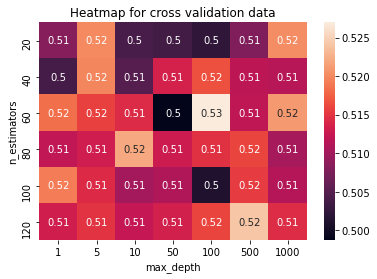

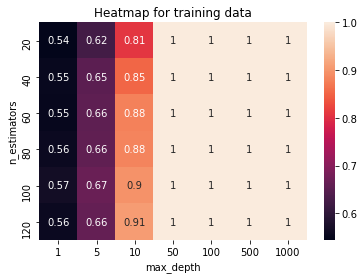

In [53]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

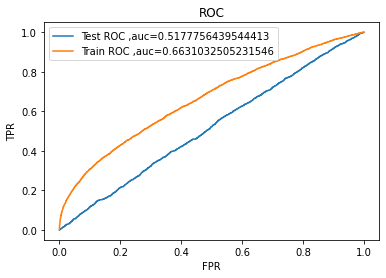

AUC on Test data is 0.5177756439544413
AUC on Train data is 0.6631032505231546
---------------------------


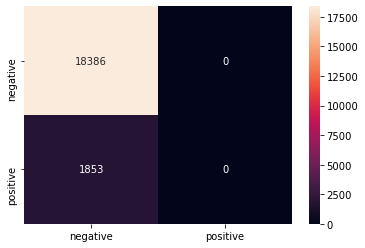

In [55]:
#training our model for max_depth=1000,n_estimators = 120
from sklearn import metrics

clf = RandomForestClassifier(max_depth = 5,n_estimators = 120)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [56]:
new_y_pred=clf.predict(rc_x_testcsv)
new_y_pred_1 = pd.DataFrame(new_y_pred)
new_y_pred_final = new_y_pred_1.rename(columns={0:"Loan Status"})
new_y_pred_final.to_csv('ohe_lessfeature_randomforest.csv', index=False)

# one hot encoding

In [109]:
ohe.fit(x_train['Batch Enrolled'].values.reshape(-1,1))
batch_train = ohe.transform(x_train['Batch Enrolled'].values.reshape(-1,1))
batch_test = ohe.transform(x_test['Batch Enrolled'].values.reshape(-1,1))
batch_cv = ohe.transform(x_cv['Batch Enrolled'].values.reshape(-1,1))

ohe.fit(x_train['Grade'].values.reshape(-1,1))
grade_train = ohe.transform(x_train['Grade'].values.reshape(-1,1))
grade_test = ohe.transform(x_test['Grade'].values.reshape(-1,1))
grade_cv = ohe.transform(x_cv['Grade'].values.reshape(-1,1))

ohe.fit(x_train['Sub Grade'].values.reshape(-1,1))
subgrade_train = ohe.transform(x_train['Sub Grade'].values.reshape(-1,1))
subgrade_test = ohe.transform(x_test['Sub Grade'].values.reshape(-1,1))
subgrade_cv = ohe.transform(x_cv['Sub Grade'].values.reshape(-1,1))

ohe.fit(x_train['Employment Duration'].values.reshape(-1,1))
employment_train = ohe.transform(x_train['Employment Duration'].values.reshape(-1,1))
employment_test = ohe.transform(x_test['Employment Duration'].values.reshape(-1,1))
employment_cv = ohe.transform(x_cv['Employment Duration'].values.reshape(-1,1))

ohe.fit(x_train['Verification Status'].values.reshape(-1,1))
vstatus_train = ohe.transform(x_train['Verification Status'].values.reshape(-1,1))
vstatus_test = ohe.transform(x_test['Verification Status'].values.reshape(-1,1))
vstatus_cv = ohe.transform(x_cv['Verification Status'].values.reshape(-1,1))


ohe.fit(x_train['Loan Title'].values.reshape(-1,1))
title_train = ohe.transform(x_train['Loan Title'].values.reshape(-1,1))
title_test = ohe.transform(x_test['Loan Title'].values.reshape(-1,1))
title_cv = ohe.transform(x_cv['Loan Title'].values.reshape(-1,1))

ohe.fit(x_train['Initial List Status'].values.reshape(-1,1))
ilstatus_train = ohe.transform(x_train['Initial List Status'].values.reshape(-1,1))
ilstatus_test = ohe.transform(x_test['Initial List Status'].values.reshape(-1,1))
ilstatus_cv = ohe.transform(x_cv['Initial List Status'].values.reshape(-1,1))

ohe.fit(x_train['Application Type'].values.reshape(-1,1))
type_train = ohe.transform(x_train['Application Type'].values.reshape(-1,1))
type_test = ohe.transform(x_test['Application Type'].values.reshape(-1,1))
type_cv = ohe.transform(x_cv['Application Type'].values.reshape(-1,1))

from scipy.sparse import hstack

cat_x_train = hstack([batch_train,grade_train,subgrade_train,employment_train,vstatus_train,title_train,ilstatus_train,type_train]).tocsr()
cat_x_test = hstack([batch_test,grade_test,subgrade_test,employment_test,vstatus_test,title_test,ilstatus_test,type_test]).tocsr()
cat_x_cv = hstack([batch_cv,grade_cv,subgrade_cv,employment_cv,vstatus_cv,title_cv,ilstatus_cv,type_cv]).tocsr()
                     
                     

ohe_x_train = hstack([cat_x_train,real_x_train])
ohe_x_test = hstack([cat_x_test,real_x_test])
ohe_x_cv = hstack([cat_x_cv,real_x_cv])

In [116]:
ohe.fit(x_train['Initial List Status'].values.reshape(-1,1))
ohe.categories_

[array(['f', 'w'], dtype=object)]

In [119]:
cat_x_train.shape

(33056, 124)

In [110]:
ohe_x_train.shape

(33056, 142)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 80
optimal max_depth 1


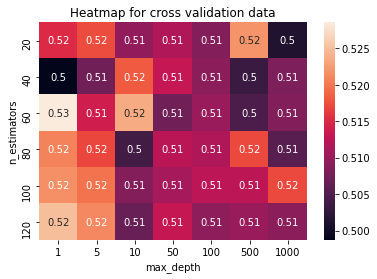

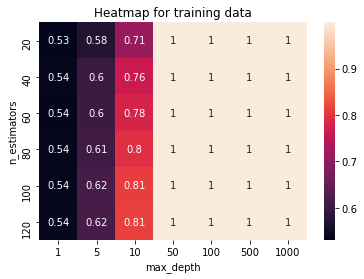

In [112]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data1 = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data1.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data1 = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data1.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()